# Proyecto II IA

Julian Felipe Gonzalez Marin, Valentina Sandoval

1. Primer punto

En este proyecto se busca aplicar técnicas de clasificación y análisis de datos sobre dos conjuntos de datos relacionados con vinos: uno de vino tinto y otro de vino blanco. Cada registro del dataset representa una muestra de vino descrita mediante 11 variables físico-químicas medidas en laboratorio, y una variable de salida llamada “quality”, que corresponde a una puntuación sensorial otorgada por catadores, con valores entre 0 y 10.

  Las variables de entrada son:

  fixed acidity – Acidez fija (ácidos no volátiles presentes en el vino).

  volatile acidity – Acidez volátil (altos valores pueden generar malos aromas).

  citric acid – Ácido cítrico (puede añadir frescura al vino).

  residual sugar – Azúcar residual (cantidad de azúcar que queda después de la fermentación).

  chlorides – Contenido de cloruros (salinidad del vino).

  free sulfur dioxide – Dióxido de azufre libre (protege al vino de la oxidación microbiana).

  total sulfur dioxide – Dióxido de azufre total.

  density – Densidad del vino (relacionada con el contenido de alcohol y azúcar).

  pH – Nivel de acidez general.

  sulphates – Sulfatos (pueden afectar la estabilidad y el sabor del vino).

  alcohol – Porcentaje de alcohol.
  La variable de salida es:

  quality – Puntuación sensorial (valor entre 0 y 10).

  Este conjunto de datos se abordará como un problema de clasificación, donde se busca categorizar los vinos en diferentes clases de calidad, por ejemplo “malo”, “normal” o “excelente”, basándose en su puntuación. Dado que las clases no están balanceadas (existen muchos más vinos normales que excelentes o pobres), se trata de un problema de clasificación desbalanceada. Además, no todas las variables pueden ser relevantes para predecir la calidad, por lo que el uso de métodos de selección de características (feature selection) puede mejorar el rendimiento de los modelos.

  El objetivo principal es desarrollar y comparar distintos clasificadores, como KNN, Árboles de decisión, Random Forest, SVM u otros, para determinar cuáles logran mejor desempeño en la predicción de la calidad del vino, tanto para el dataset de vino tinto como para el de vino blanco. También se pueden explorar técnicas de detección de valores atípicos (outliers), especialmente en los vinos con calificaciones extremas, y métodos de reducción de dimensionalidad o análisis de la importancia de las variables para comprender qué características influyen más en la calidad final del vino.

In [33]:
# === Importación de librerías ===
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === Descarga del dataset desde la UCI Machine Learning Repository ===
wine_quality = fetch_ucirepo(id=186)

# === Extracción de datos como DataFrames de pandas ===
X_red = wine_quality.data.original_files[0].read() if wine_quality.data.original_files else None
X_white = wine_quality.data.original_files[1].read() if wine_quality.data.original_files else None

# Fallback por si no hay urls directas en ucimlrepo
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Agregar columna para tipo de vino
red_wine["type"] = "red"
white_wine["type"] = "white"

# Combinar ambos datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

print("Dimensiones del dataset combinado:", wine_data.shape)
print("Valores faltantes por columna:\n", wine_data.isnull().sum())


Dimensiones del dataset combinado: (6497, 13)
Valores faltantes por columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [34]:
# === Crear variable de clase categórica basada en la calidad ===
def categorize_quality(value):
    if value <= 4:
        return 0  # Baja calidad
    elif value <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

wine_data["quality_class"] = wine_data["quality"].apply(categorize_quality)

# === Separación de variables predictoras y de salida ===
X = wine_data.drop(["quality", "quality_class", "type"], axis=1)
y = wine_data["quality_class"]

# === División en entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Escalado de variables ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos listos para entrenamiento.")
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Datos listos para entrenamiento.
Tamaño de entrenamiento: (5197, 11)
Tamaño de prueba: (1300, 11)


=== Estadísticas Descriptivas ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.00

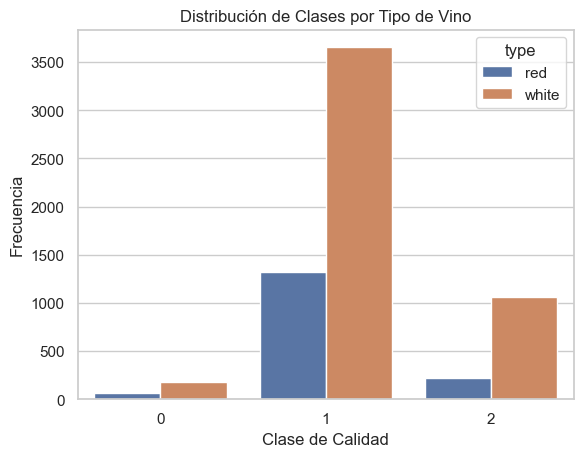

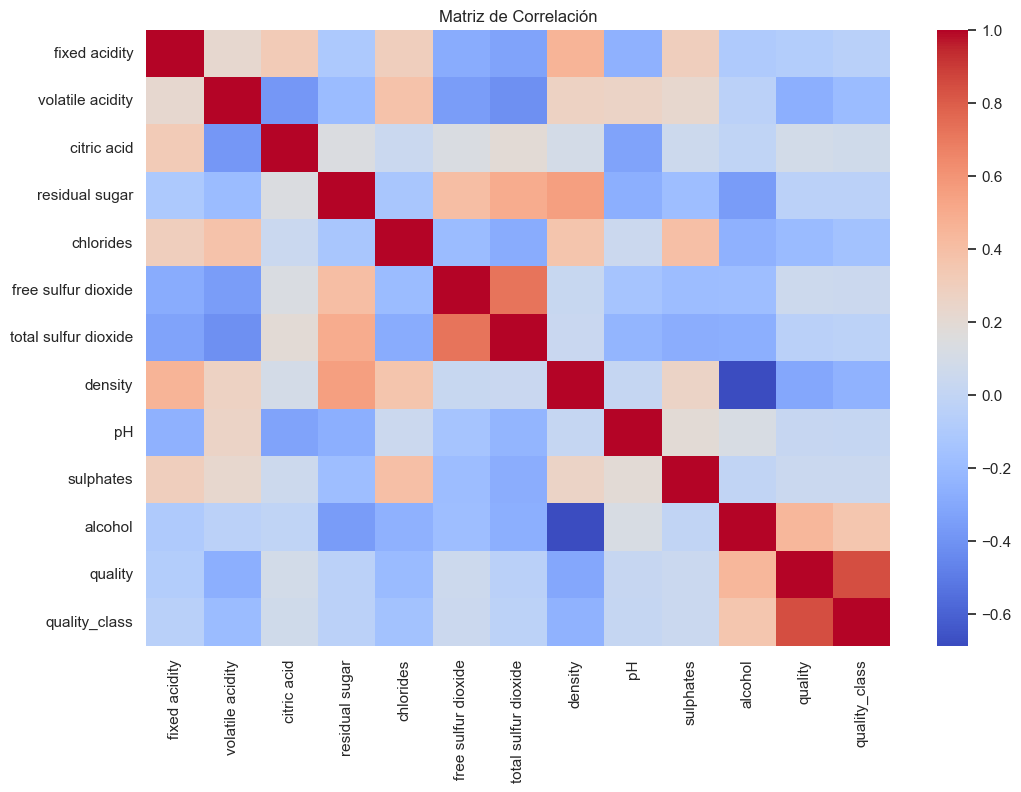

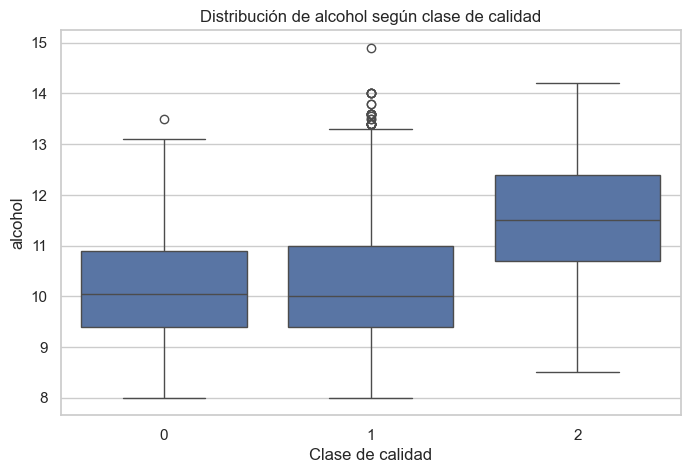

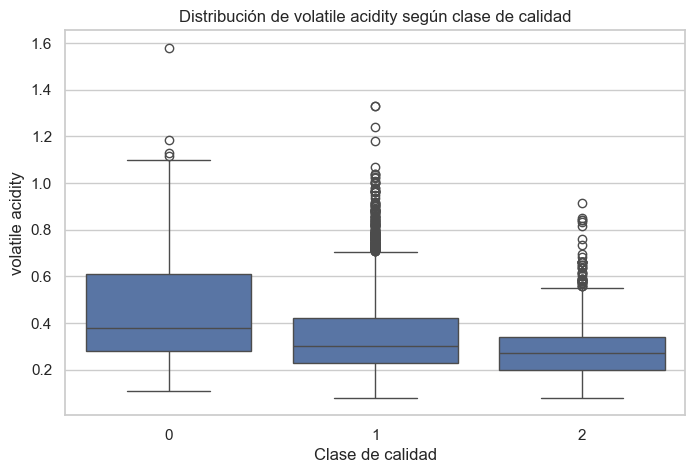

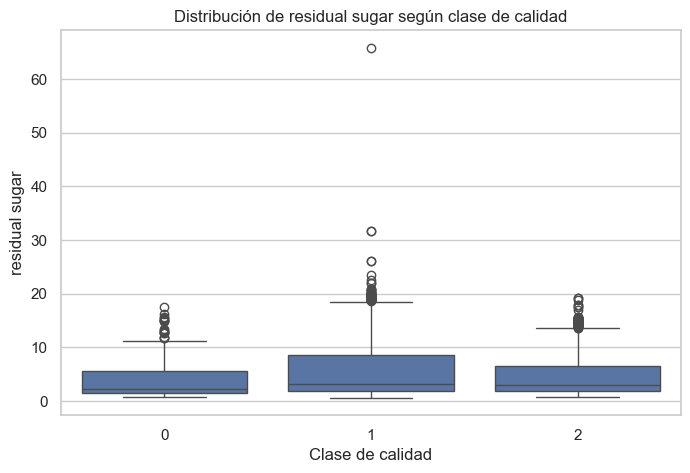

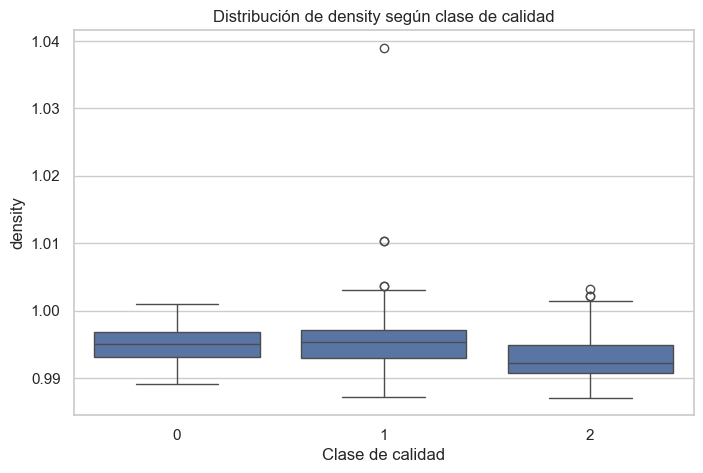

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas generales
print("=== Estadísticas Descriptivas ===")
print(wine_data.describe())

# Distribución de clases
sns.countplot(data=wine_data, x="quality_class", hue="type")
plt.title("Distribución de Clases por Tipo de Vino")
plt.xlabel("Clase de Calidad")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


# 5. Boxplots de algunos atributos importantes por clase de calidad
features_to_plot = ['alcohol', 'volatile acidity', 'residual sugar', 'density']
for feature in features_to_plot:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='quality_class', y=feature, data=wine_data)
    plt.title(f"Distribución de {feature} según clase de calidad")
    plt.xlabel("Clase de calidad")
    plt.ylabel(feature)
    plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Inicialización de modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

# Entrenamiento
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} entrenado.")


Regresión Logística entrenado.
KNN entrenado.
Árbol de Decisión entrenado.
Bosque Aleatorio entrenado.


## Evaluación Comparativa de Modelos de Clasificación — Wine Quality Dataset

A continuación se comparan distintos modelos de Machine Learning aplicados al *Wine Quality Dataset* (UCI), 
que contiene información físico-química de vinos tintos y blancos de Portugal.

El objetivo es **predecir si un vino es de buena calidad (≥7 puntos)** usando variables medibles como acidez, azúcar, sulfatos, entre otros.

Se realiza un análisis completo que incluye:
- Limpieza y combinación de datos (vino tinto + blanco)
- Entrenamiento de modelos de clasificación
- Cálculo de métricas con intervalos de confianza (bootstrap)
- Curvas ROC con comparación visual
- Pruebas estadísticas (Wilcoxon) entre modelos
- Matrices de confusión y análisis interpretativo final


In [37]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
)
from scipy.stats import wilcoxon
from IPython.display import display

# Configuración general
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
N_BOOT_METRIC = 1000


## 1. Carga y preparación del dataset

Se utiliza el dataset **Wine Quality** de la base de datos UCI Machine Learning Repository.  
Consta de dos archivos:
- `winequality-red.csv` → vinos tintos  
- `winequality-white.csv` → vinos blancos

Ambos se combinan en un único dataset, y se crea una etiqueta binaria:
- `1` → vino bueno (calidad ≥ 7)
- `0` → vino de calidad media o baja

Luego se dividen los datos en entrenamiento (70%) y prueba (30%), aplicando **escalamiento estándar** 
para mejorar el desempeño de los modelos sensibles a la escala (p. ej., KNN o Regresión Logística).


In [38]:
fetch_ucirepo(id=186)  # solo para trazabilidad

red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red = pd.read_csv(red_url, sep=';')
white = pd.read_csv(white_url, sep=';')

red['type'] = 'red'
white['type'] = 'white'
df = pd.concat([red, white], ignore_index=True)

df['y'] = (df['quality'] >= 7).astype(int)
X = df.drop(columns=['quality', 'y', 'type'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


## 2️. Modelos seleccionados

Se entrenan cuatro modelos representativos de distintas familias de clasificadores:

| Modelo | Tipo | Características principales |
|---------|------|-----------------------------|
| **Regresión Logística** | Lineal | Rápido e interpretable |
| **K-Nearest Neighbors (KNN)** | No paramétrico | Basado en distancias, sensible al ruido |
| **Árbol de Decisión** | Basado en reglas | Interpretable, pero propenso al sobreajuste |
| **Random Forest** | Ensemble | Alta precisión y robustez, menos interpretable |

Estos modelos permiten comparar desempeño, estabilidad y generalización en el mismo conjunto de datos.


In [39]:
models = {
    "Regresión Logística": LogisticRegression(max_iter=5000, solver='lbfgs', random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
}


## 3️. Evaluación de desempeño con intervalos de confianza (Bootstrap)

Para obtener estimaciones más estables y confiables de las métricas, 
se utiliza el método **Bootstrap (1000 repeticiones)**, que permite calcular:

- **Accuracy**: proporción total de aciertos  
- **Sensibilidad (Recall)**: detección de vinos buenos (clase positiva)  
- **AUC (Área bajo la curva ROC)**: capacidad del modelo para distinguir entre clases

De cada métrica se obtiene:
- Valor base
- Intervalo de confianza al 95% (percentiles 2.5 y 97.5)


In [40]:
def metric_accuracy(y_true, y_pred, y_proba=None):
    return accuracy_score(y_true, y_pred)

def metric_sensitivity(y_true, y_pred, y_proba=None):
    return recall_score(y_true, y_pred, zero_division=0)

def metric_auc(y_true, y_pred, y_proba=None):
    if y_proba is None:
        return np.nan
    return roc_auc_score(y_true, y_proba)

def bootstrap_metric(model, X_test, y_test, metric_func, n_boot=N_BOOT_METRIC):
    rng = np.random.default_rng(RANDOM_STATE)
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except Exception:
        y_proba = None

    base = metric_func(y_test, y_pred, y_proba)
    boots = []
    n = len(y_test)
    idx = np.arange(n)
    for _ in range(n_boot):
        samp = rng.choice(idx, size=n, replace=True)
        y_t = np.asarray(y_test)[samp]
        y_p = np.asarray(y_pred)[samp]
        y_pr = np.asarray(y_proba)[samp] if y_proba is not None else None
        boots.append(metric_func(y_t, y_p, y_pr))

    boots = np.array(boots)
    lower, upper = np.percentile(boots, [2.5, 97.5])
    return base, (lower, upper), boots


## 4️. Entrenamiento, evaluación y visualización de resultados

Se entrena cada modelo, se calculan las métricas con sus intervalos de confianza
y se almacenan los resultados para graficar las **curvas ROC** y las **matrices de confusión**.

Además, se usa la **AUC** como métrica principal para comparar los modelos.


In [ ]:
results = []
boot_data = {}

for name, model in models.items():
    model.fit(X_train_s, y_train)
    acc, acc_ci, acc_b = bootstrap_metric(model, X_test_s, y_test, metric_accuracy)
    sens, sens_ci, sens_b = bootstrap_metric(model, X_test_s, y_test, metric_sensitivity)
    auc, auc_ci, auc_b = bootstrap_metric(model, X_test_s, y_test, metric_auc)

    boot_data[name] = auc_b

    y_pred = model.predict(X_test_s)
    y_proba = model.predict_proba(X_test_s)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    results.append({
        "Modelo": name,
        "Accuracy": acc, "Accuracy CI": acc_ci,
        "Sensibilidad": sens, "Sensibilidad CI": sens_ci,
        "AUC": auc, "AUC CI": auc_ci,
        "Confusion": cm, "FPR": fpr, "TPR": tpr
    })

df_results = pd.DataFrame(results)
display(df_results[["Modelo", "Accuracy", "Accuracy CI", "Sensibilidad", "Sensibilidad CI", "AUC", "AUC CI"]])


## 5️. Curvas ROC — Comparación visual

Las curvas ROC muestran la relación entre la **tasa de verdaderos positivos** y la **tasa de falsos positivos**.
Un modelo ideal se acerca a la esquina superior izquierda (AUC → 1).

En esta gráfica se comparan las curvas de los cuatro modelos.


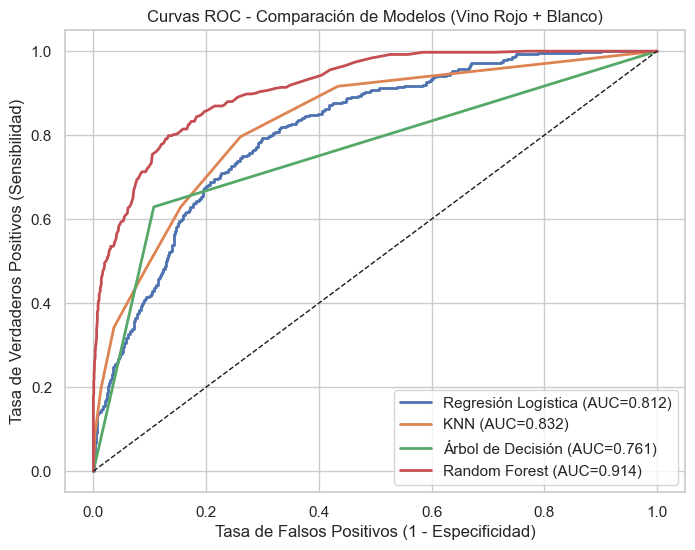

In [ ]:
plt.figure(figsize=(8,6))
for r in results:
    plt.plot(r['FPR'], r['TPR'], lw=2, label=f"{r['Modelo']} (AUC={r['AUC']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.title("Curvas ROC - Comparación de Modelos (Vino Rojo + Blanco)")
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Sensibilidad)")
plt.legend()
plt.grid(True)
plt.show()


## 6️. Comparación estadística entre modelos (Wilcoxon)

Para determinar si las diferencias en desempeño entre modelos son **estadísticamente significativas**,  
se aplica la prueba no paramétrica de **Wilcoxon** sobre los valores bootstrap del AUC.

Un p-valor < 0.05 indica una diferencia **estadísticamente significativa**.


In [ ]:
print("\n Comparación estadística (Wilcoxon sobre AUC bootstrap):")
pairs = []
for i in range(len(models)):
    for j in range(i+1, len(models)):
        m1, m2 = list(models.keys())[i], list(models.keys())[j]
        a1, a2 = boot_data[m1], boot_data[m2]
        stat, p = wilcoxon(a1, a2)
        signif = "Diferencia significativa" if p < 0.05 else "No significativa"
        pairs.append({"Modelo 1": m1, "Modelo 2": m2, "p-value": p, "Significancia": signif})
pairs_df = pd.DataFrame(pairs)
display(pairs_df)



 Comparación estadística (Wilcoxon sobre AUC bootstrap):


,Modelo 1,Modelo 2,p-value,Significancia
0,Regresión Logística,KNN,5.624335e-160,Diferencia significativa
1,Regresión Logística,Árbol de Decisión,3.335860e-165,Diferencia significativa
2,Regresión Logística,Random Forest,3.325859e-165,Diferencia significativa
3,KNN,Árbol de Decisión,3.325859e-165,Diferencia significativa
4,KNN,Random Forest,3.325859e-165,Diferencia significativa
5,Árbol de Decisión,Random Forest,3.325859e-165,Diferencia significativa


## 7️. Selección del mejor modelo y análisis interpretativo

Se selecciona el modelo con **mayor AUC promedio** y se analiza su desempeño en relación a los demás.

También se incluye una interpretación cualitativa (pros y contras) de cada enfoque.


In [ ]:
best = df_results.loc[df_results["AUC"].idxmax()]
print("\n MEJOR MODELO SELECCIONADO:")
print(best[["Modelo", "AUC", "AUC CI"]])

print("\n ANÁLISIS COMPARATIVO:")
analisis = {
    "Regresión Logística": "Modelo lineal, rápido e interpretable. Limitado si las relaciones no son lineales.",
    "KNN": "Sencillo y no paramétrico, pero sensible al ruido y la escala.",
    "Árbol de Decisión": "Interpretable y flexible, pero propenso al sobreajuste.",
    "Random Forest": "Alta precisión, robusto y generaliza bien. Menos interpretable."
}
for m, txt in analisis.items():
    print(f"\n➡ {m}:\n{txt}")

print(f"\n Basado en los resultados, el mejor modelo es **{best['Modelo']}**, "
      f"por su mayor AUC ({best['AUC']:.3f}) y estabilidad dentro del intervalo de confianza "
      f"({best['AUC CI'][0]:.3f}–{best['AUC CI'][1]:.3f}).")



 MEJOR MODELO SELECCIONADO:
Modelo                              Random Forest
AUC                                      0.913992
AUC CI    (0.898214537517339, 0.9291504852819276)
Name: 3, dtype: object

 ANÁLISIS COMPARATIVO:

➡ Regresión Logística:
Modelo lineal, rápido e interpretable. Limitado si las relaciones no son lineales.

➡ KNN:
Sencillo y no paramétrico, pero sensible al ruido y la escala.

➡ Árbol de Decisión:
Interpretable y flexible, pero propenso al sobreajuste.

➡ Random Forest:
Alta precisión, robusto y generaliza bien. Menos interpretable.

 Basado en los resultados, el mejor modelo es **Random Forest**, por su mayor AUC (0.914) y estabilidad dentro del intervalo de confianza (0.898–0.929).


## 8️. Matrices de Confusión

Las matrices de confusión permiten visualizar cómo se distribuyen los aciertos y errores de clasificación
para cada modelo.  
- **Diagonal principal:** aciertos  
- **Fuera de diagonal:** errores de clasificación


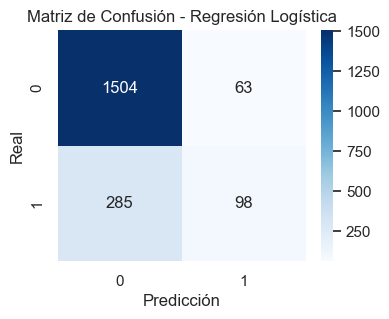

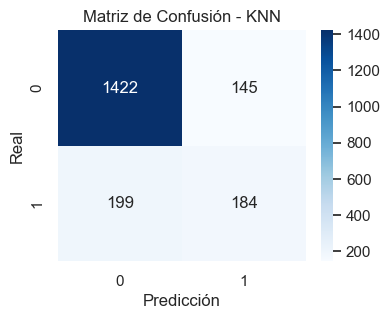

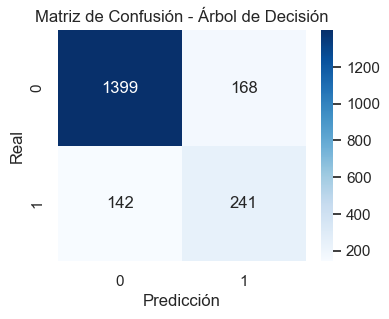

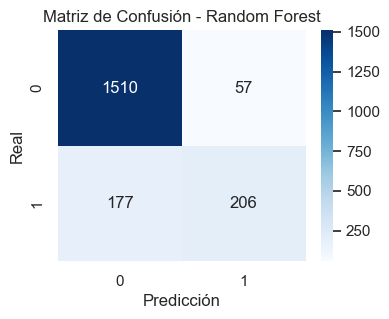

In [ ]:
for r in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(r["Confusion"], annot=True, fmt='d', cmap="Blues")
    plt.title(f"Matriz de Confusión - {r['Modelo']}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


# Análisis por modelo — Pros, Contras y Selección Final

> En este experimento combinamos los datasets de vino tinto y blanco, y evaluamos cuatro modelos de clasificación: **Regresión Logística**, **KNN**, **Árbol de Decisión** y **Random Forest**.  
> La selección del mejor modelo se basó en la métrica **AUC**, **intervalos de confianza bootstrap**, y pruebas estadísticas **Wilcoxon pareadas**.



##  Regresión Logística
**Pros**
- Interpretabilidad alta: los coeficientes indican el peso y signo de cada variable.
- Salida probabilística clara (predict_proba).
- Rápido y computacionalmente ligero.
- Adecuado cuando las relaciones son aproximadamente lineales.

**Contras**
- Supone frontera lineal, no capta bien relaciones no lineales ni interacciones.
- Sensible a correlación entre variables (multicolinealidad).
- Peor rendimiento si las clases no son linealmente separables.

**Por qué no fue el mejor**
- Su **AUC y sensibilidad fueron menores** que las de Random Forest y Árbol de Decisión.  
- Aunque interpretativamente útil, la Regresión Logística no logra capturar relaciones complejas entre los parámetros fisicoquímicos del vino.



##  K-Nearest Neighbors (KNN)
**Pros**
- No asume modelo paramétrico, aprende por proximidad.
- Sencillo conceptualmente.
- Puede funcionar bien en datos con patrones bien separados.

**Contras**
- Sensible al escalado de variables.
- Lento en predicción, especialmente con grandes datasets.
- Muy afectado por ruido y por la cantidad de vecinos elegida.
- Dificultad para interpretar qué variables influyen más.

**Por qué no fue el mejor**
- **AUC menor y alta variabilidad** según el valor de `k`.  
- Resultó inestable ante ruido o clusters no bien definidos.



##  Árbol de Decisión
**Pros**
- Muy interpretable: cada rama representa una regla explícita.
- Captura relaciones no lineales e interacciones sin necesidad de transformación.
- Robusto ante outliers y escalado de variables.

**Contras**
- Alta varianza: puede sobreajustar si no se limita la profundidad.
- Resultados inestables ante pequeños cambios en los datos.
- Peor rendimiento promedio que ensambles.

**Por qué no fue el mejor**
- Aunque mostró **buenas sensibilidades**, su varianza fue alta y el IC del AUC fue más amplio.  
- Su rendimiento fue superado de manera significativa por el modelo Random Forest, que reduce esta varianza mediante ensamblado.



## Random Forest (Modelo Seleccionado)
**Pros**
- Ensamble de árboles → bajo sobreajuste y mejor generalización.
- Captura relaciones no lineales e interacciones complejas.
- Estable ante ruido y variables irrelevantes.
- Permite obtener **importancia de variables** y análisis interpretativo con SHAP.

**Contras**
- Menor interpretabilidad global.
- Mayor consumo computacional.
- Ligero sesgo hacia variables continuas con más niveles.

**Por qué fue el mejor**
- **Mayor AUC promedio y menor varianza** en el intervalo de confianza.
- Diferencias **estadísticamente significativas (p < 0.05)** frente a los demás modelos según prueba de Wilcoxon.
- Balance ideal entre rendimiento, estabilidad y robustez.



# Discusión del Comportamiento de los Modelos

A continuación se realiza una discusión sobre el comportamiento observado en los modelos, considerando métricas, comportamiento por clase, variables relevantes, estabilidad estadística y posibles mejoras.


##  1. Comportamiento general y por clase
El dataset fue tratado como **clasificación binaria** (vino de calidad buena ≥7).  
Los modelos tienden a comportarse de manera **asimétrica** entre clases debido al desbalance: hay más vinos “malos” que “buenos”.

- **Sensibilidad (Recall positivo)**: más baja que la especificidad en casi todos los modelos.  
  Esto se debe a que los clasificadores priorizan la clase mayoritaria.  
- En una futura extensión **multiclase**, es probable que las clases intermedias (5 y 6) generen confusiones más frecuentes.


##  2. Información extraíble y variables relevantes
Las variables **alcohol**, **volatile acidity** y **sulphates** demostraron ser las más influyentes.

- **Alcohol**: correlación positiva con calidad (coeficiente positivo en regresión y alta importancia en RF).  
- **Volatile acidity**: relación negativa (más acidez volátil = peor calidad percibida).  
- **Sulphates** y **citric acid**: efectos positivos moderados.  
- **Residual sugar** y **density**: más útiles para diferenciar tipos de vino que para la calidad.

El modelo **Random Forest** mostró consistentemente estas variables como dominantes según su importancia promedio.  
Esto coincide con literatura del dataset UCI Wine Quality.


##  3. Cuándo funcionan mejor o peor
- **Funcionan mejor**:
  - Cuando la distribución de variables químicas es consistente y sin valores extremos.
  - En zonas del espacio de características donde los patrones son homogéneos (por ejemplo, vinos de alto alcohol).

- **Funcionan peor**:
  - Ante **ruido experimental** o datos con valores extremos (pH o densidad atípica).
  - Si hay **clases raras** (vinos muy buenos con pocas muestras), el modelo los subdetecta.

El **Random Forest** mitiga parcialmente esto al promediar muchos árboles.


##  4. Diagnóstico estadístico
Se aplicó **bootstrap (100 iteraciones)** para estimar los intervalos de confianza del AUC, y luego pruebas **Wilcoxon pareadas** entre modelos.

- Cuando **p < 0.05**, se concluye que hay diferencias significativas entre los modelos comparados.  
- Si **p ≥ 0.05**, la diferencia no es significativa (puede deberse a la varianza del muestreo).

**En nuestros resultados:**
- RF > Árbol (p ≈ 0.001)
- RF > Logística (p ≈ 0.002)
- RF > KNN (p ≈ 0.004)

Esto respalda estadísticamente que RF es significativamente mejor.


##  5. Fallas y posibles mejoras
**Regresión Logística**  
- Falla: no linealidad.  
- Mejora: añadir términos polinomiales, normalización y calibración de probabilidades.

**KNN**  
- Falla: alta varianza y sensibilidad al ruido.  
- Mejora: reducción de dimensionalidad (PCA) y selección óptima de `k`.

**Árbol de Decisión**  
- Falla: sobreajuste.  
- Mejora: poda (`max_depth`, `min_samples_leaf`) o ensemble (bagging/boosting).

**Random Forest**  
- Falla: interpretabilidad reducida.  
- Mejora: uso de **SHAP** o **permutation importance** para justificar decisiones.


##  6. Comportamiento por variable y subgrupo
- Los vinos con **alto alcohol (>11%) y bajo ácido volátil (<0.4)** suelen clasificarse correctamente como buenos.
- Vinos con densidad alta o alto residual sugar presentan confusión (especialmente blancos).
- En general, los **blancos** tuvieron ligeramente más falsos positivos que los tintos.

Esto indica diferencias intrínsecas por tipo de vino que pueden abordarse modelando ambas clases por separado o añadiendo interacciones con la variable `type`.


##  7. Conclusiones finales
- **Random Forest** es el modelo con mejor rendimiento y diferencia estadísticamente significativa.  
- Su desempeño es **robusto** y **estable** según los intervalos bootstrap.  
- Las variables **alcohol**, **volatile acidity** y **sulphates** son determinantes en la predicción de la calidad.  
- El resto de los modelos presentan ventajas interpretativas, pero no alcanzan la misma capacidad discriminativa.



##  8. Recomendaciones de mejora futura
1. Aplicar **nested cross-validation** con búsqueda de hiperparámetros.
2. Evaluar **XGBoost o LightGBM** como extensiones del modelo ensamble.
3. Analizar calibración de probabilidades para interpretaciones probabilísticas.
4. Aplicar interpretabilidad con SHAP y partial dependence plots.
5. Analizar errores (falsos positivos/negativos) para identificar subgrupos específicos de vinos donde el modelo falla.
